The cell below produces a button that toggles code in this notebook on and off.

In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



# Deeper RNNs

- running average

$$
h_{t}^{\text{ave}} = \frac{t-1}{t}h_{t-1}^{\text{ave}} + \frac{1}{t}x_t
$$

$$
h_{t}^{\text{var}} = \frac{t-1}{t}h_{t-1}^{\text{var}} + \frac{1}{t}\left(x_t^{\,} - h_{t}^{\text{ave}}\right)\left(x_t^{\,} - h_{t-1}^{\text{ave}}\right)
$$

$$
h_t^{\text{var}} = \frac{1}{t}\sum_{j=1}^t\left(x_j - h_t^{\text{ave}}\right)^2
$$

https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Welford's_Online_algorithm

https://www.johndcook.com/blog/standard_deviation/

https://github.com/jermwatt/CNN_RNN_dev/blob/master/BT_RNN/RNNseq2seq_BinaryAddition.ipynb

## Histogram history

In [166]:
def update_histogram(h_t,x_t):
    # round to 100th decimal
    x_t = np.round(x_t,1)
    
    # ceiling / floor
    if x_t < -4:
        x_t = -4
    if x_t > 4:
        x_t = 4
    
    # one-hot encode
    h_t[x_t] += 1
    return h_t

In [167]:
# initialize hidden (histogram) state
bins = np.unique(np.array([np.round(a,1) for a in np.linspace(-4,4,10000)]))
h = {a:0 for a in bins}

# update hidden state
for x_t in x:
    h = update_histogram(h,x_t)

In [168]:
h.values()

dict_values([2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 3, 1, 1, 3, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1])

<IPython.core.display.Javascript object>


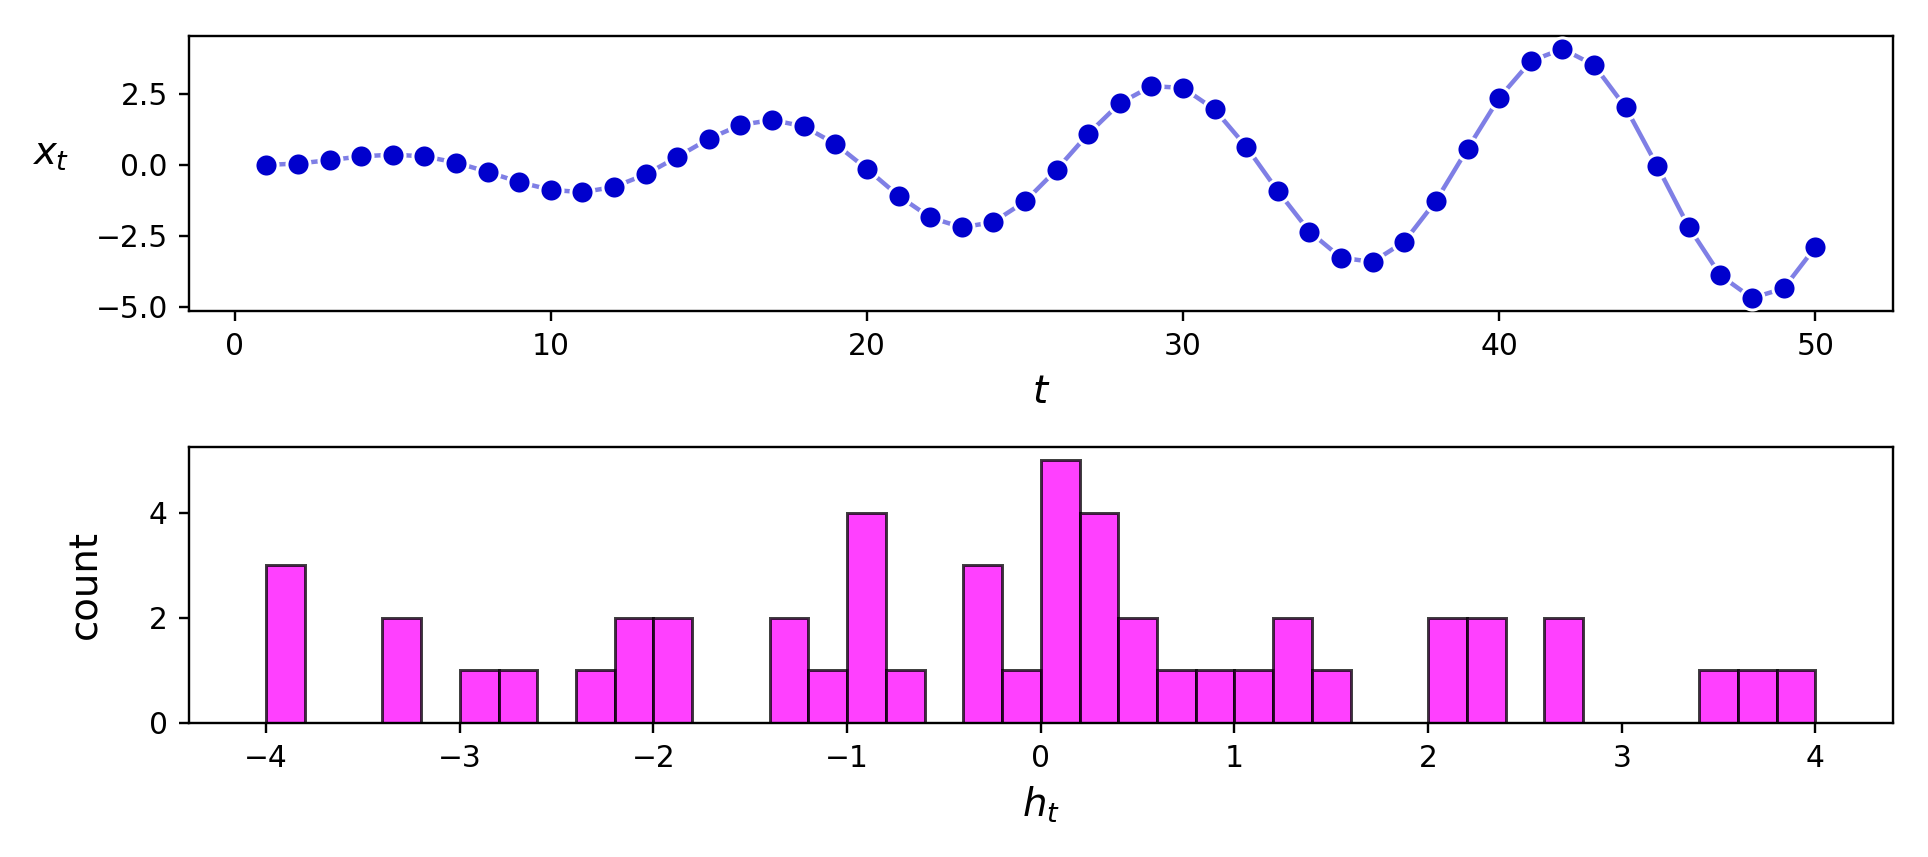

In [177]:
plot_hidden_histogram(x,h)